<a href="https://colab.research.google.com/github/bharathpgowda/Machine_learning/blob/main/Cloths_Images_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dependencies import and install

In [ ]:
!pip install -U tensorflow_datasets

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Loading Fashion MNIST dataset(70,000 grayscale images in 10 categories 28*28)

In [ ]:
dataset,metadata = tfds.load('fashion_mnist',as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


explore the data

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples: {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples: 10000


Preprocess the data

In [ ]:
def normalize(images,labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images,labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

Explore the processed data

In [ ]:
for image,label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28)) 

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

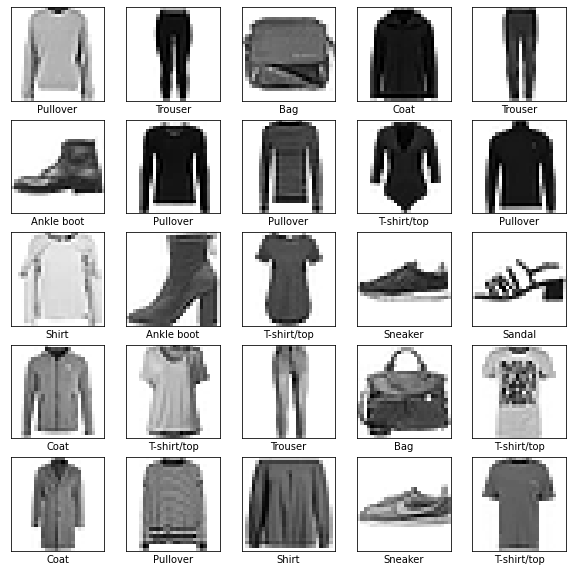

In [ ]:
#display the first 25 images from training set and display the class name.
plt.figure(figsize=(10,10))
for i, (image,label) in enumerate(train_dataset.take(25)):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
plt.show  

Setup the layers

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28,1)),
                            tf.keras.layers.Dense(128,activation=tf.nn.relu),
                            tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                            ])

compile the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Train the model

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset= test_dataset.cache().batch(BATCH_SIZE)

In [ ]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 12s 4ms/step - loss: 0.4956 - accuracy: 0.8256
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3718 - accuracy: 0.8657
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3321 - accuracy: 0.8786
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3071 - accuracy: 0.8866
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2935 - accuracy: 0.8923


Evaluate accuracy(take test dataset)

In [ ]:
test_loss,test_accuracy = model.evaluate(test_dataset,steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:',test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.3529 - accuracy: 0.8721
Accuracy on test dataset: 0.8720999956130981


Making predictions

In [ ]:
for test_images,test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [ ]:
predictions.shape

(32, 10)

In [ ]:
predictions[0]

array([1.2492754e-05, 2.6796320e-07, 1.3532651e-02, 9.4796442e-06,
       9.7939795e-01, 6.4410255e-11, 7.0455642e-03, 8.0557450e-11,
       1.6420216e-06, 5.1648619e-10], dtype=float32)

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
test_labels[0]

4

In [ ]:
def plot_image(i, predictions_array, true_labels,images):
  predictions_array, true_label,img = predictions_array[i],true_labels[i],images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0],cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color) 
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue') 

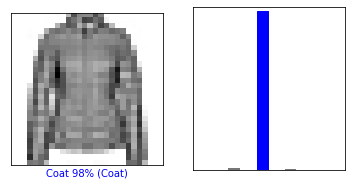

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

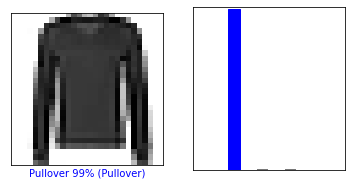

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

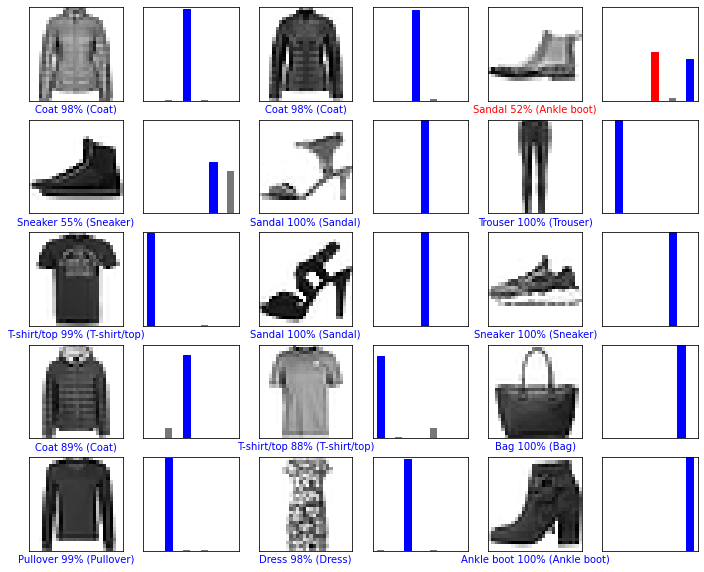

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [ ]:
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [ ]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.2492741e-05 2.6796346e-07 1.3532644e-02 9.4796269e-06 9.7939795e-01
  6.4410255e-11 7.0455610e-03 8.0557137e-11 1.6420184e-06 5.1648419e-10]]


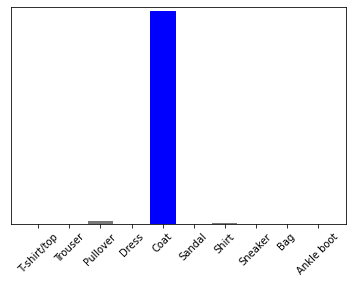

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

4